### Linear Regression from scratch

In this notebook we will try to build the linear regression model from scratch.

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Variables to store mean and std
mu = []
std = []

In [4]:
# function for loading data
def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.columns = ["housesize", "rooms", "price"]
    data = np.array(df, dtype=float)
    plot_data(data[:, :2], data[:, -1])
    normalize(data)
    return data[:, :2], data[:, -1]

#### Normalization 

To avoid bias in our machine learning model we normalize the data, so that the values in all columns lay in the same range. Beside that it also reduces the risk of inbalance in the variance and mathematical mean.

In [5]:
def normalize(data):
    for i in range(0, data.shape[1] - 1):
        mu.append(np.mean(data[:, i]))
        std.append(np.std(data[:, i]))
        data[:, i] = ((data[:, i] - np.mean(data[:, i])) / np.std(data[:, i]))

#### Plot the original data 

To check if the current data set works for linear regression, it is a easy way to plot the data and see if it fits the purpose.

In [6]:
def plot_data(x, y):
    plt.xlabel("housesize")
    plt.ylabel("price")
    plt.plot(x[:, 0], y, "bo")
    plt.show()

#### Hypothesis of linear regression

Our hypothesis is:
    
    ß = theta
    hß(x) = ß0x0 + ß1x1 ... ßnxn

We use use hß(x) later in the cost function.

In [7]:
def h(x, theta):
    return np.matmul(x, theta)

#### Cost function

To evaluate the quality of our model we define the cost function J(ß). This also the function we try minimize in the next step.  

In [8]:
def cost_function(x, y, theta):
    return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

#### Gradient descent 

Gradient descent is our optimization algorithm that aims to adjust the parameters so that the error gets smaller and smaller. 
To update our parameters we multiply the derivative of the cost function with the learning rate alpha and subtract it from the current parametrs ß. 
The function returns the parameter vector ß and J_all which is a list of the cost function after each epoche.   

In [9]:
# define Gradient descent
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for i in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1/m)*(x.T@(h_x - y))
        theta = theta - learning_rate*cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

In [10]:
def plot_cost(J_all, num_epochs):
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.plot(num_epochs, J_all, "m", linewidth="5")
    plt.show()

In [19]:
def test(theta, x):
    x[0] = ((x[0] - mu[0])/std[0])
    x[1] = ((x[1] - mu[1])/std[1])

    y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
    print("Price of house: ", y)

#### Call functions 


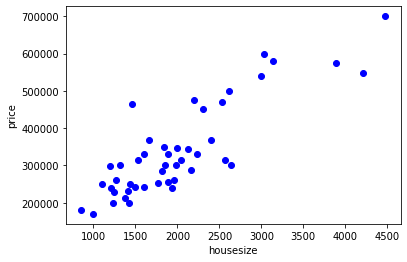

Cost:  
 [[2.08475311e+09]]
Parameters:  
 [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


In [18]:
x, y = load_data("house_price_data.txt")
# reshape the list to a one dimensional vector
y = np.reshape(y, (46, 1))
# linear regression assumes that x1 is always 1 so we ad a vector with 1s
x = np.hstack((np.ones((x.shape[0], 1)), x))
# initialize vector theta with zeros
theta = np.zeros((x.shape[1], 1))
# set learning rate to 0.1
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ","\n", J)
print("Parameters: ","\n", theta)

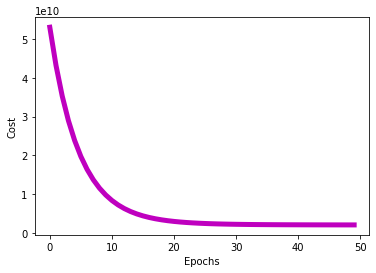

Price of house:  [285201.81900083]


In [20]:
# for testing and plotting cost
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

test(theta, [1600, 3])